## RFM Analysis

The three attributes on which you may want to build the model, which includes monetary, recency and frequency, are not part of the data set. So, you would need to build or derive these from the existing pool of features:
* __Recency__: It measures how recently a customer has visited the store or made a purchase.

* __Frequency__: It measures the frequency of the transactions made by the customers.

* __Monetary__: It measures the amount of money that a customer has spent on their purchases.

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn 
from sklearn.preprocessing import StandardScaler

In [298]:
retail_df = pd.read_csv("Online+Retail.csv",sep=',', encoding="ISO-8859-1", header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [299]:
# basics of the df  
retail_df.shape

(541909, 8)

In [300]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [301]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# The steps are broadly
1. Read and visualise the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and recomendations

# 2. cleaning the data

In [302]:
# Handle missing values
round(100*(retail_df.isnull().sum())/len(retail_df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [303]:
# drop all rows having missing values
retail_df = retail_df.dropna()

In [304]:
retail_df.shape

(406829, 8)

In [305]:
retail_df['amount']  = retail_df.UnitPrice * retail_df.Quantity
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


# 3. Prepare for modelling

- R Recency : Number of days since last purchase
- F Frequency : Number of transactions
- M  Monetary : Total amount of transactions in 1 year (revenue contributed)

In [306]:
# Data should look like this
# cust_id recency freq monetary 

Let’s start with creating customer-wise data. You can then compute the total monetary value of the purchases made by each customer. Now, let’s create the monetary and frequency columns.

In [307]:
# monetary
grouped_df = retail_df.groupby('CustomerID')["amount"].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [308]:
# frequency
frequency = retail_df.groupby('CustomerID')["InvoiceNo"].count()
frequency = frequency.reset_index()
frequency.columns = ["CustomerID", "frequency"]
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [309]:
#merging 2 dataframes
grouped_df = pd.merge(grouped_df, frequency, on="CustomerID", how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [310]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [311]:
# recency will be how mamy dayas before the last transaction took place as compared to the reference date
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [312]:
# invouce Date is an object which needs to be converted to datatime format
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format='%d-%m-%Y %H:%M')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [313]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [314]:
# compute the max date
max_date = max(retail_df["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [315]:
# compute the diff  
retail_df['diff'] = max_date - retail_df["InvoiceDate"]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [316]:
# recency 
last_purchase = retail_df.groupby("CustomerID")['diff'].min()
last_purchase = last_purchase.reset_index()


In [317]:
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [318]:
grouped_df = pd.merge(grouped_df, last_purchase, on="CustomerID", how='inner')
grouped_df.columns = ["CustomerID","amount","frequency","recency"]
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [319]:
# data part only
import datetime as dt
grouped_df['recency'] = grouped_df.recency.dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [320]:
grouped_df.describe()

,CustomerID,amount,frequency,recency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,93.053294,91.047118
std,1722.390705,8219.345141,232.471608,100.765435
min,12346.000000,-4287.630000,1.000000,0.000000
25%,13812.750000,293.362500,17.000000,16.000000
50%,15300.500000,648.075000,42.000000,49.000000
75%,16778.250000,1611.725000,102.000000,142.000000
max,18287.000000,279489.020000,7983.000000,373.000000


### 1. Outlier Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x17ecf0c3ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x17ecf0b0280>,
 'boxes': [<matplotlib.lines.Line2D at 0x17ecf0c39d0>],
 'medians': [<matplotlib.lines.Line2D at 0x17ecf0b0820>],
 'fliers': [<matplotlib.lines.Line2D at 0x17ecf0b0af0>],
 'means': []}

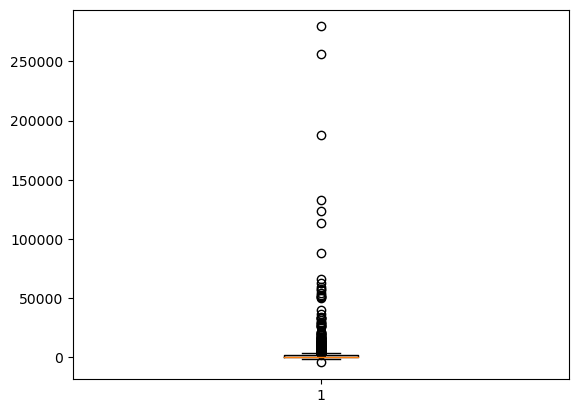

In [321]:
plt.boxplot(grouped_df.amount)

{'whiskers': [<matplotlib.lines.Line2D at 0x17ecf208d00>,
 'caps': [<matplotlib.lines.Line2D at 0x17ecf2802e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17ecf208a30>],
 'medians': [<matplotlib.lines.Line2D at 0x17ecf280820>],
 'fliers': [<matplotlib.lines.Line2D at 0x17ecf280af0>],
 'means': []}

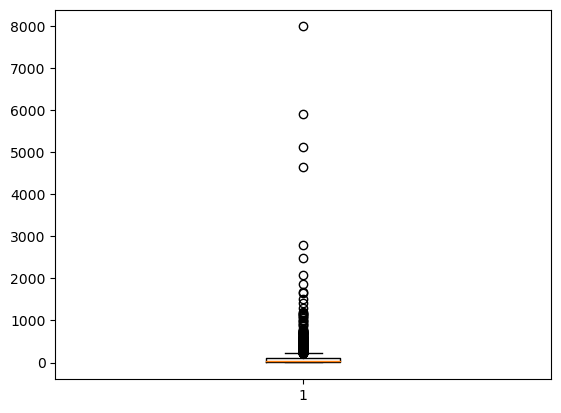

In [322]:
plt.boxplot(grouped_df.frequency)

{'whiskers': [<matplotlib.lines.Line2D at 0x17ecf117fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x17ecf125580>,
 'boxes': [<matplotlib.lines.Line2D at 0x17ecf117cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x17ecf125b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x17ecf125df0>],
 'means': []}

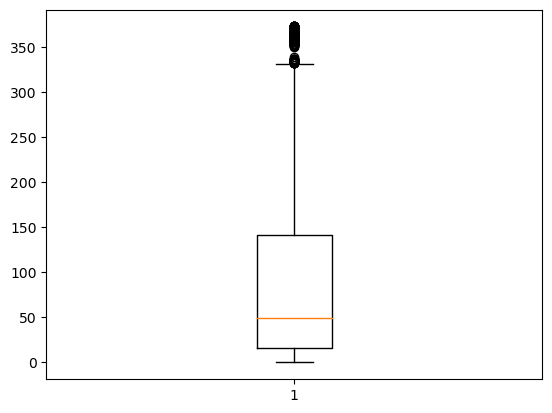

In [323]:
plt.boxplot(grouped_df.recency)

In [324]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

### 2. rescaling to same scale ( Standardization)

In [325]:
# here we are removing the outliers analyised after making below model
# removing statistical outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3- Q1 
grouped_df = grouped_df[(grouped_df.amount >=Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3- Q1 
grouped_df = grouped_df[(grouped_df.recency >=Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3- Q1 
grouped_df = grouped_df[(grouped_df.frequency >=Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]


In [326]:
rfm_df = grouped_df[["amount","frequency", "recency"]]
rfm_df.head()

,amount,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [327]:
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
print(rfm_df_scaled.shape)
rfm_df_scaled[:5]

(4293, 3)


array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       [ 0.277517  , -0.04472006, -0.73814058],
       [-0.53323453, -0.60327469,  2.14318788]])

In [328]:
#First convert the numpy array that you have to a dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']

In [329]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.9553975969859558

# 4 Modelling

In [330]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [331]:
from sklearn.cluster import KMeans

In [332]:
# K-means with some arbitrary j
# help(KMeans)
Kmeans = KMeans(n_clusters=4, max_iter=50)
Kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [333]:
len(Kmeans.labels_)

4293

In [334]:
Kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

In [335]:
labels = pd.DataFrame(Kmeans.labels_)
labels.value_counts()

1    2267
2    1035
0     769
3     222
dtype: int64

In [336]:
import plotly.express as px

In [337]:
px.scatter_3d(rfm_df_scaled, x='amount',y='frequency',z='recency', color=Kmeans.labels_)

## Using elbow curve to find optimal number of clusters

In [338]:
## also called as sum of squared distances
from sklearn.cluster import KMeans
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit_transform(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)   # inertia_ is the sum of squared distances to their closest clusters center.


Text(0.5, 0, 'number of clusters = [2, 3, 4, 5, 6, 7, 8]')

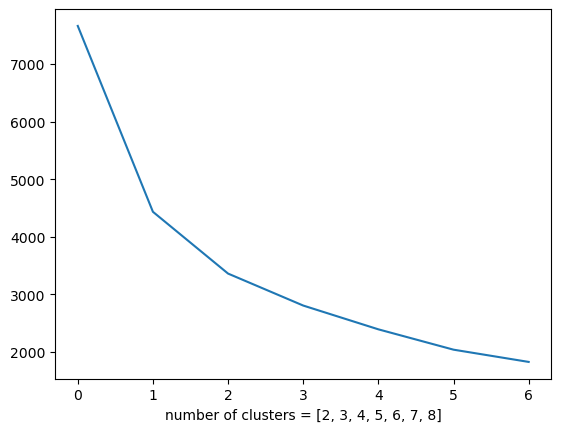

In [339]:
plt.plot(ssd)
plt.xlabel(f"number of clusters = {range_n_clusters}")

## silhouette score computation

In [340]:
from sklearn.metrics import silhouette_score

In [341]:
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit_transform(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("for n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

for n_clusters=2, the silhouette score is 0.5415858652525395
for n_clusters=3, the silhouette score is 0.5084896296141937
for n_clusters=4, the silhouette score is 0.4817567985759693
for n_clusters=5, the silhouette score is 0.46627005641897035
for n_clusters=6, the silhouette score is 0.41758431193450735
for n_clusters=7, the silhouette score is 0.41737121320456805
for n_clusters=8, the silhouette score is 0.40210621012629366


In [355]:
# cluster 0 is 1 and 1 is 0 as compared to the notebook provided by Upgrad

In [342]:
# we will choose 3 as the optimal number of clusters as it best represents the costumer segments

In [343]:
# final model with k = 3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit_transform(rfm_df_scaled)

array([[2.88737609, 4.98811469, 0.82508811],
       [2.3104536 , 1.11761774, 3.66371994],
       [0.63106393, 3.1471123 , 1.90403647],
       ...,
       [1.52335699, 4.21706387, 0.72255303],
       [0.74034183, 3.83680437, 2.3954824 ],
       [0.51580365, 2.78606109, 2.24732539]])

In [344]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [345]:
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [346]:
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='cluster_id', ylabel='amount'>

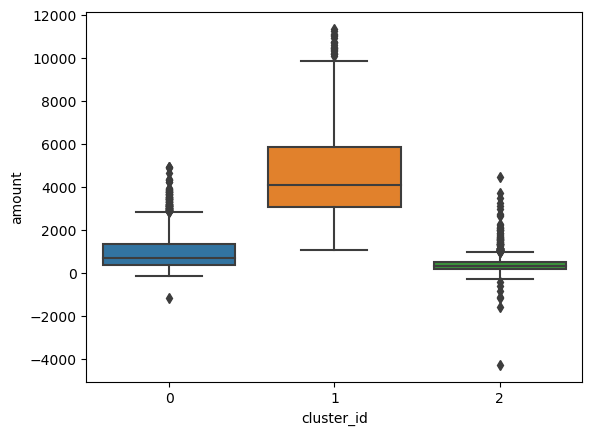

In [351]:
sns.boxplot(x='cluster_id',y='amount',data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='recency'>

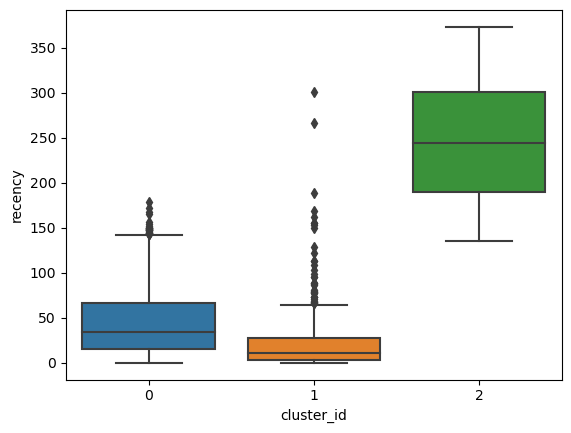

In [352]:
sns.boxplot(x='cluster_id',y='recency',data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='frequency'>

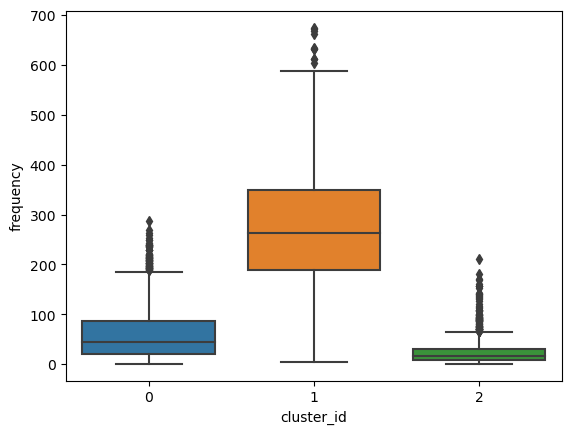

In [353]:
sns.boxplot(x='cluster_id',y='frequency',data=grouped_df)

In [354]:
grouped_df.describe()

,CustomerID,amount,frequency,recency,cluster_id
count,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000
mean,15302.803793,1223.549018,75.542730,92.979396,0.611801
std,1720.920603,1610.886452,95.299058,101.083134,0.858947
min,12346.000000,-4287.630000,1.000000,0.000000,0.000000
25%,13815.500000,288.160000,17.000000,17.000000,0.000000
50%,15304.000000,628.280000,40.000000,50.000000,0.000000
75%,16779.500000,1491.470000,96.000000,146.500000,1.500000
max,18287.000000,11341.100000,674.000000,373.000000,2.000000
